
# 1. Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:


In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# 2. Logistic	Regression

Some	regression	algorithms	can	be	used	for	classification	as	well	(and
vice	versa).	Logistic	Regression	(also	called	Logit	Regression)	is	commonly	used	to	estimate	the
probability	that	an	instance	belongs	to	a	particular	class	(e.g.,	what	is	the	probability	that	this	email	is
spam?).	If	the	estimated	probability	is	greater	than	50%,	then	the	model	predicts	that	the	instance	belongs
to	that	class	(called	the	positive	class,	labeled	“1”),	or	else	it	predicts	that	it	does	not	(i.e.,	it	belongs	to
the	negative	class,	labeled	“0”).	This	makes	it	a	binary	classifier.

# 2.1 Estimating	Probabilities

So	how	does	it	work?	Just	like	a	Linear	Regression	model,	a	Logistic	Regression	model	computes	a
weighted	sum	of	the	input	features	(plus	a	bias	term),	but	instead	of	outputting	the	result	directly	like	the
Linear	Regression	model	does,	it	outputs	the	logistic	of	this	result (see	Equation	4-13).
![title, width=10, height=5](../tutorial/Selection_010.png) 

The	logistic	—	also	called	the	logit,	noted	σ(·)	—	is	a	sigmoid	function	(i.e.,	S-shaped)	that	outputs	a
number	between	0	and	1.	It	is	defined	as	shown	in	Equation	4-14
![title, width=10, height=5](../tutorial/Selection_009.png)

# Plotting logistic function

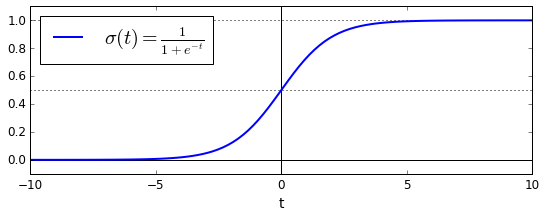

In [2]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Once	the	Logistic	Regression	model	has	estimated	the	probability	 ![title, width=10, height=5](../tutorial/Selection_011.png)		that	an	instance	x	belongs	to
the	positive	class,	it	can	make	its	prediction	ŷ	easily	(see	Equation)
![title, width=5, height=5](../tutorial/Selection_012.png)


Notice	that	σ(t)	<	0.5	when	t	<	0,	and	σ(t)	≥	0.5	when	t	≥	0,	so	a	Logistic	Regression	model	predicts	1	if
θ T 	·	x	is	positive,	and	0	if	it	is	negative.

# 2.2 Training	and	Cost	Function

Now	you	know	how	a	Logistic	Regression	model	estimates	probabilities	and	makes	predictions.
But	how	is	it	trained?	The	objective	of	training	is	to	set	the	parameter	vector	θ	so	that	the	model	estimates
high	probabilities	for	positive	instances	(y	=	1)	and	low	probabilities	for	negative	instances	(y	=	0).	This
idea	is	captured	by	the	cost	function	shown	in	Equation	4-16	for	a	single	training	instance	x.

![title, width=5, height=5](../tutorial/Selection_013.png)

This	cost	function	makes	sense	because	–	log(t)	grows	very	large	when	t	approaches	0,	so	the	cost	will
be	large	if	the	model	estimates	a	probability	close	to	0	for	a	positive	instance,	and	it	will	also	be	very
large	if	the	model	estimates	a	probability	close	to	1	for	a	negative	instance.	On	the	other	hand,	–	log(t)	is
close	to	0	when	t	is	close	to	1,	so	the	cost	will	be	close	to	0	if	the	estimated	probability	is	close	to	0	for	a
negative	instance	or	close	to	1	for	a	positive	instance,	which	is	precisely	what	we	want.

The	cost	function	over	the	whole	training	set	is	simply	the	average	cost	over	all	training	instances.	It	can
be	written	in	a	single	expression	(as	you	can	verify	easily),	called	the	log	loss,	shown	in	Equation	4-17.

![title, width=5, height=5](../tutorial/Selection_014.png)

The	bad	news	is	that	there	is	no	known	closed-form	equation	to	compute	the	value	of	θ	that	minimizes	this
cost	function	(there	is	no	equivalent	of	the	Normal	Equation).	But	the	good	news	is	that	this	cost	function
is	convex,	so	Gradient	Descent	(or	any	other	optimization	algorithm)	is	guaranteed	to	find	the	global
minimum	(if	the	learning	rate	is	not	too	large	and	you	wait	long	enough).	The	partial	derivatives	of	the
cost	function	with	regards	to	the	j th 	model	parameter	θ j 	is	given	by	Equation	4-18.

![title, width=5, height=5](../tutorial/Selection_015.png)

For	each	instance	it	computes	the	prediction	error	and
multiplies	it	by	the	j th 	feature	value,	and	then	it	computes	the	average	over	all	training	instances.	Once	you
have	the	gradient	vector	containing	all	the	partial	derivatives	you	can	use	it	in	the	Gradient	Descent
algorithm.	That’s	it:	you	now	know	how	to	train	a	Logistic	Regression	model.	

# 3. Univariate Logistic Regression

Let’s	use	the	iris	dataset	to	illustrate	Logistic	Regression.	This	is	a	famous	dataset	that	contains	the	sepal
and	petal	length	and	width	of	150	iris	flowers	of	three	different	species:	Iris-Setosa,	Iris-Versicolor,	and
Iris-Virginica	(see	Figure	4-22).

![title, width=5, height=5](../tutorial/Selection_016.png)


Let’s	try	to	build	a	classifier	to	detect	the	Iris-Virginica	type	based	only	on	the	petal	width	feature.	First
let’s	load	the	data:

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['target', 'feature_names', 'target_names', 'data', 'DESCR']

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
print(iris.target) #gives a detailed descriptipon of the Iris dataset

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Now we will get the petal width feature alone and the corresponding labels for the univariate classification task.

In [6]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
print(X[1:5])
print(y)

[[ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Now	let’s	train	a	Logistic	Regression	model:

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
# solver is liblinear,and is limited to one-versus-rest schemes.
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let’s	look	at	the	model’s	estimated	probabilities	for	flowers	with	petal	widths	varying	from	0	to	3	cm

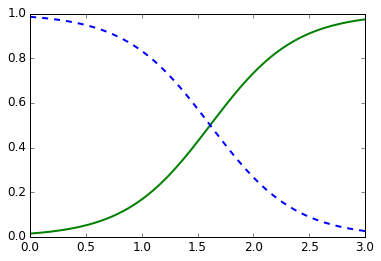

In [8]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")


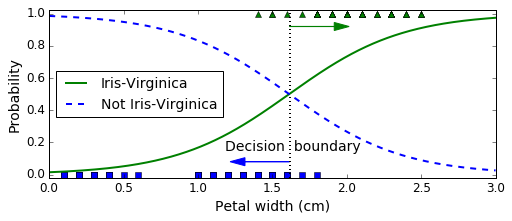

In [9]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

The	petal	width	of	Iris-Virginica	flowers	(represented	by	triangles)	ranges	from	1.4	cm	to	2.5	cm,	while
the	other	iris	flowers	(represented	by	squares)	generally	have	a	smaller	petal	width,	ranging	from	0.1	cm
to	1.8	cm.	Notice	that	there	is	a	bit	of	overlap.	Above	about	2	cm	the	classifier	is	highly	confident	that	the
flower	is	an	Iris-Virginica	(it	outputs	a	high	probability	to	that	class),	while	below	1	cm	it	is	highly
confident	that	it	is	not	an	Iris-Virginica	(high	probability	for	the	“Not	Iris-Virginica”	class).	In	between
these	extremes,	the	classifier	is	unsure.	However,	if	you	ask	it	to	predict	the	class	(using	the	 predict()
method	rather	than	the	 predict_proba() 	method),	it	will	return	whichever	class	is	the	most	likely.
Therefore,	there	is	a	decision	boundary	at	around	1.6	cm	where	both	probabilities	are	equal	to	50%:	if
the	petal	width	is	higher	than	1.6	cm,	the	classifier	will	predict	that	the	flower	is	an	Iris-Virginica,	or	else
it	will	predict	that	it	is	not	(even	if	it	is	not	very	confident):

In [10]:
decision_boundary

array([ 1.61561562])

In [11]:
log_reg.predict([[1.7], [1.5]])


array([1, 0])

In [12]:
log_reg.predict_proba([[1.7], [1.5]])

array([[ 0.4431381,  0.5568619],
       [ 0.5732246,  0.4267754]])